# Instacart Shopper Behvior

## Introduction ##

In this project, I am working with data from Instacart. Instacart is a grocery delivery platform where customers can place a grocery order and have it delivered to them at home. This dataset was publicly release by Instacart in 2017 for a Kaggle competition. The data being used is a modified version of the original data provided on Kaggle.

The aim of this project is to clean up the data and prepare a report that provides insight into the shopping habits of Instacart customers. I will be using plots to communicate my results. 

There are five tables in the dataset that I will be using for my analysis. These tables consist of:
1. Instacart Orders: where each row corresponds to one order made through the Instacart app
2. Products: where each row corresponds to a unique product that customers can buy
3. Order Products: where each row corresponds to one item placed in an order
4. Aisles: consists of the aisle ID number & it's corresponding aisle name
5. Departments: consist of the department ID number & it's corresponding department name

### Stages ###

1. Data overview
2. Data preprocessing
3. Exploratory Data Analysis
4. Conclusion


## Data Overview ##

In [1]:
#import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#open the data files
orders = pd.read_csv('instacart_orders.csv', sep=';')
products = pd.read_csv('products.csv', sep=';')
aisles = pd.read_csv('aisles.csv', sep=';')
departments = pd.read_csv('departments.csv', sep=';')
order_products = pd.read_csv('order_products.csv', sep=';')

In [3]:
#look at general contents of the datasets
orders.info()
print()
products.info()
print()
aisles.info()
print()
departments.info()
print()
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage

## Data Preprocessing ##

### `orders` data frame ###

In [4]:
# Check for duplicated orders
orders.duplicated().sum()

15

In [5]:
# Check for all orders placed Wednesday at 2:00 AM
# assuming that 0 in order_dow column represents Sunday
wed_2am = orders.query("order_dow==3 and order_hour_of_day==2")
print(wed_2am['user_id'].value_counts())
wed_2am.head()

user_id
107525    2
188546    2
31189     2
57671     2
106752    2
         ..
65466     1
198005    1
59591     1
120641    1
46860     1
Name: count, Length: 106, dtype: int64


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0


In [6]:
# Remove duplicate orders
orders = orders.drop_duplicates().reset_index(drop=True)
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478952 entries, 0 to 478951
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [7]:
# Double check for duplicate rows
orders.duplicated().sum()

0

In [8]:
# Double check for duplicate order IDs only
orders['order_id'].duplicated().sum()

0

In [9]:
# Check for missing values in the orders data frame
orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [10]:
# Are there any missing values where it's not a customer's first order?
repeat_cust = orders.query("order_number != 1")
repeat_cust.isna().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

There were 15 duplicated rows that I removed. I also checked for all orders placed on Wednesday at 2am. From the information provided about the instacart orders dataset, the day of week and it's corresponding number was not indicated. I made the assumption that 0 represented Sunday the traditional start of the week, but may need to adjust this assumption as I move further into my analysis. There are missing values in the orders data fram, but these are all for customers with no previous orders. It makes sense to not fill these missing values, as there should be no data or value for the columns missing values. 

### `products` data frame ###

In [11]:
# Check for fully duplicate rows
products.duplicated().sum()

0

In [12]:
# Check for just duplicate product IDs
products['product_id'].duplicated().sum()

0

In [13]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products['product_name'] = products['product_name'].str.lower()
dup_products = products[products['product_name'].duplicated(keep=False)]
dup_products.sort_values(by=['product_name']).head(10)

,product_id,product_name,aisle_id,department_id
23339,23340,18-in-1 hemp peppermint pure-castile soap,25,11
31844,31845,18-in-1 hemp peppermint pure-castile soap,25,11
19941,19942,aged balsamic vinegar of modena,19,13
13152,13153,aged balsamic vinegar of modena,19,13
24830,24831,albacore solid white tuna in water,95,15
22582,22583,albacore solid white tuna in water,95,15
9037,9038,american cheese slices,21,16
515,516,american cheese slices,21,16
49530,49531,anchovy fillets in olive oil,95,15
12325,12326,anchovy fillets in olive oil,95,15


In [14]:
# Check for duplicate product names that aren't missing
dup_products.info()
print()
dup_products['product_name'].isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 1465 entries, 37 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     1465 non-null   int64 
 1   product_name   207 non-null    object
 2   aisle_id       1465 non-null   int64 
 3   department_id  1465 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 57.2+ KB



1258

In [15]:
# Check for the # of missing values in the product data frame
products.isna().sum()

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

In [16]:
# Are all of the missing product names associated with aisle ID 100?
missing_products = products[products['product_name'].isna()]
print(missing_products[missing_products['aisle_id']==100]['aisle_id'].count())

1258


In [17]:
# Are all of the missing product names associated with department ID 21?
print(missing_products[missing_products['department_id']==21]['department_id'].count())

1258


In [18]:
# What is this ailse and department?
print(aisles[aisles['aisle_id']==100]['aisle'])
print()
print(departments[departments['department_id']==21]['department'])

99    missing
Name: aisle, dtype: object

20    missing
Name: department, dtype: object


In [19]:
# Fill missing product names with 'Unknown'
products['product_name'] = products['product_name'].fillna('Unknown')
products[products['aisle_id']==100].sample(10)

,product_id,product_name,aisle_id,department_id
47529,47530,Unknown,100,21
10768,10769,Unknown,100,21
7278,7279,Unknown,100,21
9568,9569,Unknown,100,21
25495,25496,Unknown,100,21
43846,43847,Unknown,100,21
34437,34438,Unknown,100,21
39066,39067,Unknown,100,21
33895,33896,Unknown,100,21
15433,15434,Unknown,100,21


There are no fully duplicated rows within the dataset, but there are rows with the same product names. These duplicate product names have differing product IDs, so I chose not to remove them. The order products dataset could refer to either product ID number for the same product name, so if I remove these duplicate product names, I may end up with missing product names when running my analysis. There are also no duplicate products that are missing values. All of the missing values within the products data frame were from Department ID 21 & Aisle ID 100. These IDs represent "missing" within the aisles & departments datasets. With this information it is safe to assume that these products unknown and unfortunately we do not have their department or aisle information either. The total number of these unknown products is only 0.26% of the total products in the dataset, so it shouldn't greatly affect our analysis or cause any outliers. 

### `departments` data frame

In [20]:
# Check for fully duplicate rows
departments.duplicated().sum()

0

In [21]:
# Check for duplicates in the department id column
departments['department_id'].duplicated().sum()

0

In [22]:
# Check for duplicates in the department column
departments['department'].duplicated().sum()

0

There are no duplicate rows or duplicate values within the departments dataset

### `aisles` data frame

In [23]:
# Check for fully duplicate rows
aisles.duplicated().sum()

0

In [24]:
# Check for duplicates in the aisle id column
aisles['aisle_id'].duplicated().sum()

0

In [25]:
# Check for duplicates in the aisle column
aisles['aisle'].duplicated().sum()

0

There are no duplicate rows or duplicate values within the aisles dataset

### `order_products` data frame

In [26]:
# Check for fullly duplicate rows
order_products.duplicated().sum()

0

In [27]:
# Double check for any other tricky duplicates
print(order_products[['order_id','product_id']].duplicated().sum())
print()
print(order_products['order_id'].duplicated().sum())
print()
print(order_products['product_id'].duplicated().sum())

0

4094961

4499434


In [28]:
# Sorting the order products dataset by the order id
order_products.sort_values(by=['order_id'])

,order_id,product_id,add_to_cart_order,reordered
2043091,4,34862,8.0,1
1420535,4,10054,5.0,1
1299531,4,32645,12.0,1
311805,4,46842,1.0,0
4107072,4,40285,9.0,1
...,...,...,...,...
1505667,3421077,27966,1.0,0
4000108,3421077,27845,4.0,0
719972,3421077,26940,3.0,0
4417991,3421077,45007,2.0,0


In [29]:
# Check for missing values in the order_products data frame
order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [30]:
# What are the min and max values in this column?
print(order_products['add_to_cart_order'].min())
print()
print(order_products['add_to_cart_order'].max())

1.0

64.0


In [31]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
missing_order = order_products[order_products['add_to_cart_order'].isna()]
missing_order = missing_order['order_id'].unique()
print(missing_order)

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [32]:
# Do all orders with missing values have more than 64 products?
mask = order_products['order_id'].isin(missing_order)
order_products[mask].groupby('order_id')['product_id'].count().sort_values()

order_id
9310        65
747668      65
1598369     65
1677118     65
2170451     65
          ... 
1959075     98
171934     104
2136777    108
3308010    115
61355      127
Name: product_id, Length: 70, dtype: int64

In [33]:
# Replace missing values with 999 and convert column to integer type
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999)
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype('int')
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


There are no fully duplicate rows within the order products dataset. I also checked to make sure that there are no rows that share the same order ID & product ID, as these could be implicit duplicates. There were no rows that met these conditions. While there are rows that have the same order ID or product ID, these duplicates make sense as each row in this dataset represents a single item within an instacart order. So most orders will have multiple items being purchased, and multiple orders could have the same product being purchased. The order products dataframe did contain missing values within the add_to_cart_order column. After finding the min & max values for that column, I saw that all of the orders that had missing values in this column had more than 64 products in the order. So it seems that this add to cart count stoped after 64 items. To continue, I went ahead and filled these missing values with 999, since I am unable to determine the actual order the items were added and still want to signify that these items were added at the end of the order. 

## Exploratory Data Analysis ##

In [34]:
# Find all the unique values within the order_hour_of_day column to ensure the range is correct
orders['order_hour_of_day'].unique()

array([13, 12, 19, 20, 11,  8, 18, 15, 16,  9, 22, 10,  0, 14, 17,  1,  7,
        6,  2, 21,  3, 23,  5,  4])

In [35]:
# Find all the unique values within the order_dow column to ensure the range is correct
orders['order_dow'].unique()

array([6, 5, 0, 4, 3, 1, 2])

### What time of day do people shop for groceries?

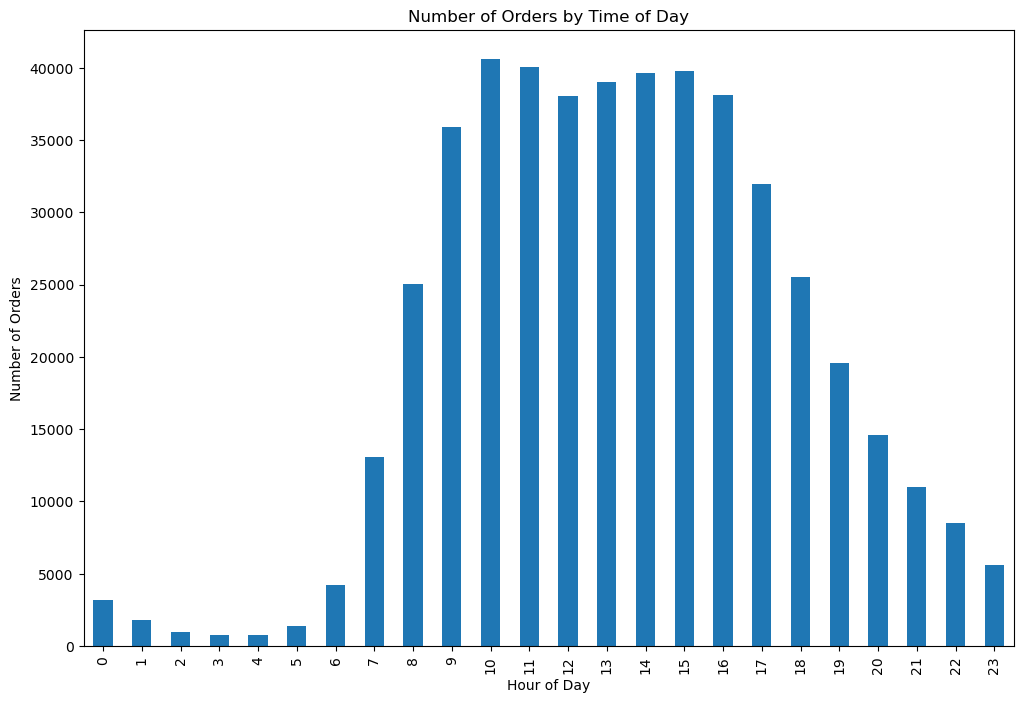

In [36]:
# Count values in the order_hour_of_day column then use this to create a bar graph showing when people grocery shop
hour_data = orders['order_hour_of_day'].value_counts(sort=False).sort_index()
hour_data.plot(kind='bar',
               x='order_hour_of_day',
               xlabel='Hour of Day',
               ylabel='Number of Orders',
               title='Number of Orders by Time of Day',
               figsize=[12,8])
plt.show()

Most orders are placed in mid-morning to the afternoon. Very early mornings are the least popular time that orders are placed

### What day of the week do people shop for groceries?

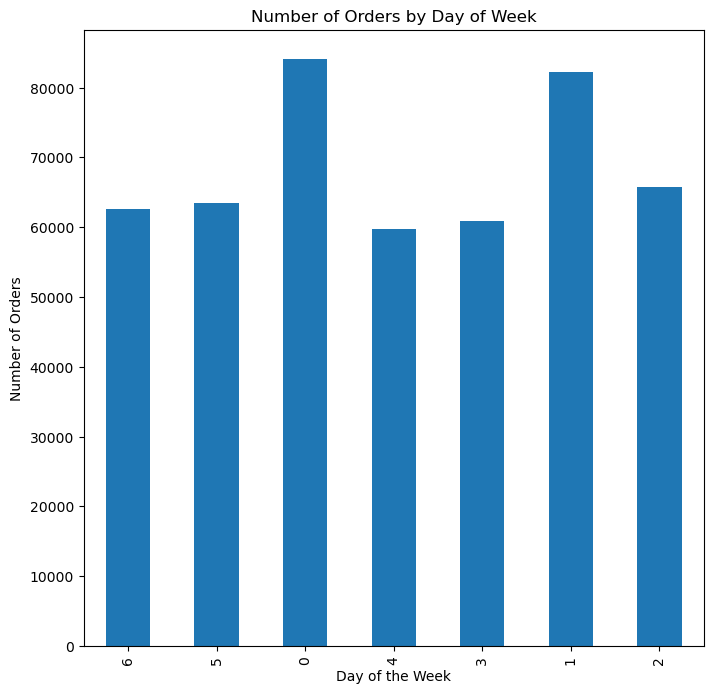

In [37]:
#Count values in the order_dow column then use this to create a bar graph showing what days people grocery shop
day_data=orders['order_dow'].value_counts(sort=False)
day_data.plot(kind='bar',
              x='order_dow',
              xlabel='Day of the Week',
              ylabel='Number of Orders',
              title='Number of Orders by Day of Week',
             figsize=[8,8])
plt.show()

Most orders are placed at the beginning of the week (Sunday & Monday).

### How long do people wait until placing another order?

In [38]:
# Find out the min and max values in the days_since_prior_order column
print(orders['days_since_prior_order'].min())
print()
print(orders['days_since_prior_order'].max())

0.0

30.0


The max # of days between orders is 30 days and the min # of days between orders is 0.

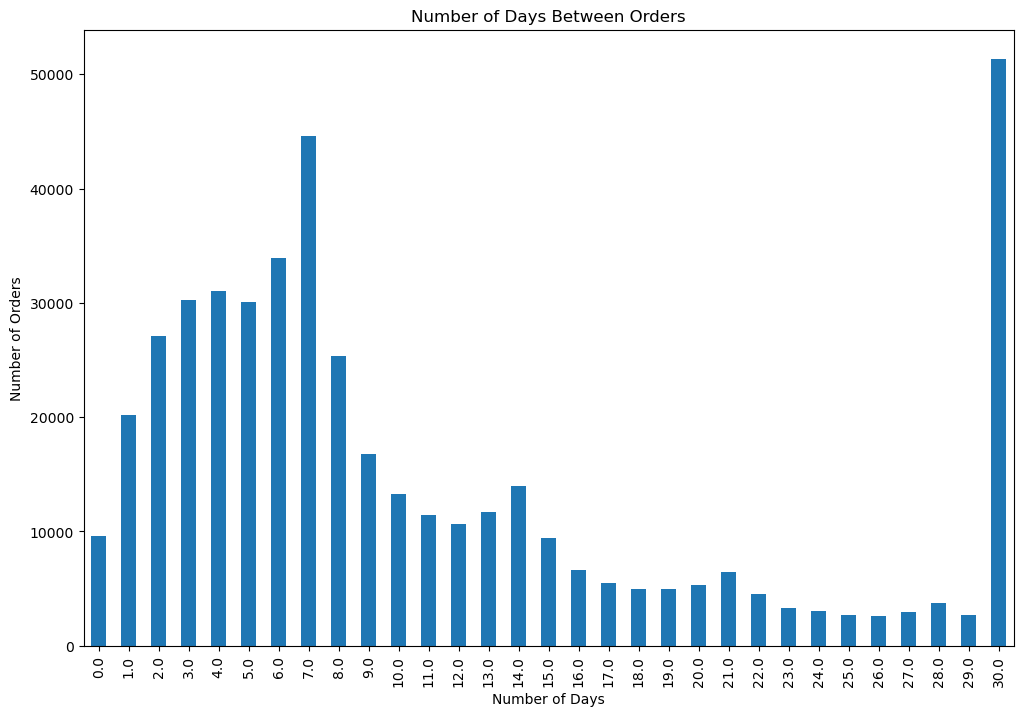

In [39]:
# Count values in the days_since_prior_order column and use this to create a bar graph showing num of days since prior order
num_days_data=orders['days_since_prior_order'].value_counts(sort=False)
num_days_data=num_days_data.sort_index()
num_days_data.plot(kind='bar',
                  x='days_since_prior_order',
                  xlabel='Number of Days',
                  ylabel='Number of Orders',
                  title='Number of Days Between Orders',
                  figsize=[12,8])
plt.show()

Most people place new orders within 10 days, but there is a large proportion of people that order every 30 days. 

### Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [40]:
# Filter out the Wed & Sat data and count values based on the order_hour_of_day column for each set of data
wed_data = orders[orders['order_dow']==3]['order_hour_of_day'].value_counts(sort=False)
sat_data = orders[orders['order_dow']==6]['order_hour_of_day'].value_counts(sort=False)

In [41]:
# Combining the Wed & Sat data into a single dataframe
combined_data = pd.concat([wed_data, sat_data], axis='columns')
combined_data.columns = ['wed_orders','sat_orders']

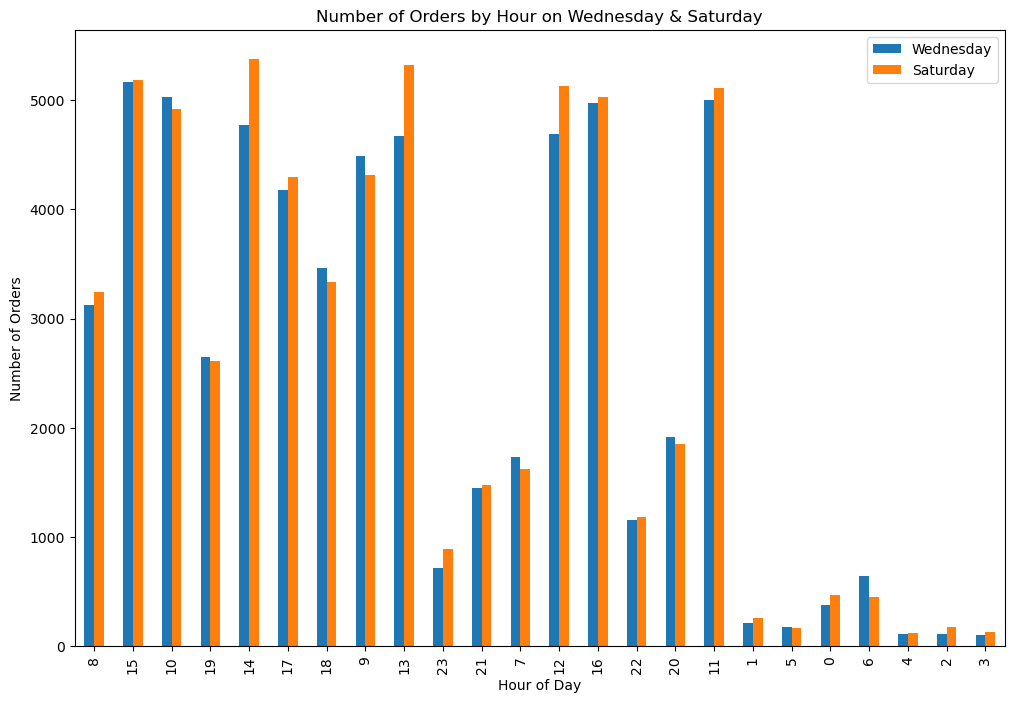

In [61]:
# Create bar graph with the combined data
combined_data.plot(kind='bar',
                   y=['wed_orders','sat_orders'],
                   xlabel='Hour of Day',
                   ylabel='Number of Orders',
                   title='Number of Orders by Hour on Wednesday & Saturday',
                   figsize=[12,8])
plt.legend(['Wednesday','Saturday'])
plt.show()

The distributions of hour of day that orders were placed on Wednesdays & Saturdays overall are pretty similar. On Saturdays, there were more orders placed in the middle of the day compared to Wednesdays. There are also more orders placed earlier in the day on Wednesdays (except before 6am). 

### What's the distribution for the number of orders per customer?

In [62]:
# Filter orders so only first time customers & repeat customers latest orders are kept
# Then count values based on order_number column
customers = orders.sort_values(by=['order_number'])
customers = customers[~customers['user_id'].duplicated(keep='last')]
customer_counts = customers['order_number'].value_counts(sort=False)

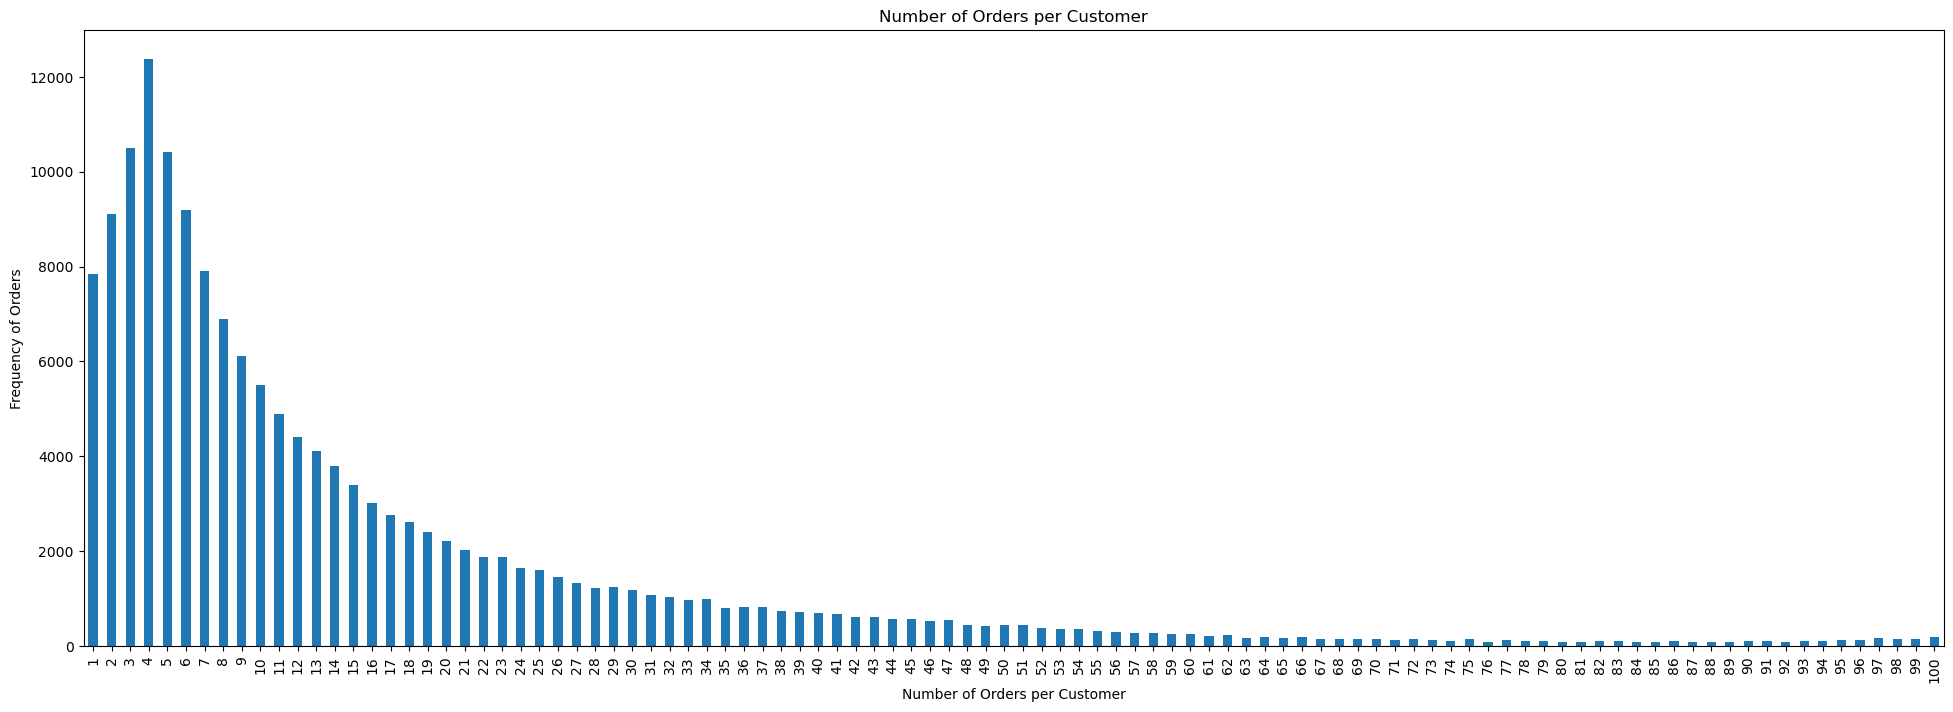

In [63]:
# Create bar graph from customers data
customer_counts.plot(kind='bar',
              x='order_number',
              xlabel='Number of Orders per Customer',
               ylabel='Frequency of Orders',
               title='Number of Orders per Customer',
               figsize=[24,8])
plt.show()

Most customers have only placed a handful of orders peaking at 5 orders. Then the distribution starts decreasing rapidly with fewer and fewer customers placing a larger quantity of orders. 

### What are the top 20 popular products (display their id and name)?

In [45]:
# Filter the top 20 products from the order_products dataset
top_20 = order_products.groupby('product_id')['order_id'].count().sort_values(ascending=False).reset_index()
top_20 = top_20[0:20]

In [46]:
# Merge the top_20 dataset with the products dataset to obtain the product names
top_20_prodts = top_20.merge(products[['product_id','product_name']], on='product_id', how='left')
top_20_prodts = top_20_prodts[['product_id','product_name']]

In [47]:
# Display top 20 products with both ID & name
top_20_prodts

,product_id,product_name
0,24852,banana
1,13176,bag of organic bananas
2,21137,organic strawberries
3,21903,organic baby spinach
4,47209,organic hass avocado
5,47766,organic avocado
6,47626,large lemon
7,16797,strawberries
8,26209,limes
9,27845,organic whole milk


The most popular ordered items are produce items & milk

### How many items do people typically buy in one order? What does the distribution look like?

In [48]:
# Group the order_products dataset by order id & count the number of products per order
items_per_order = order_products.groupby('order_id')['product_id'].count().sort_values()
items_per_order

order_id
3421079      1
1288686      1
1288764      1
1288825      1
1288873      1
          ... 
1959075     98
171934     104
2136777    108
3308010    115
61355      127
Name: product_id, Length: 450046, dtype: int64

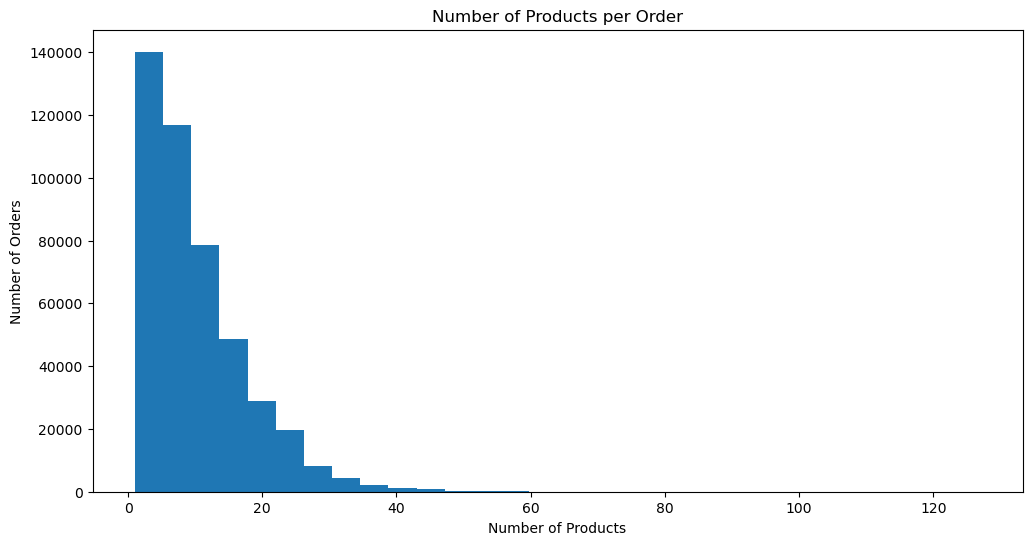

In [49]:
# Plot the items_per_order dataset
items_per_order.plot(kind='hist',
                    bins=30,
                    title='Number of Products per Order',
                    figsize=[12,6])
plt.xlabel('Number of Products')
plt.ylabel('Number of Orders')
plt.show()

The vast majority of instacart orders consist of 20 items or less.

### What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [50]:
# Filter the top 20 products that are reodered products from order_products dataset
top_20_ro = order_products[order_products['reordered']==1].groupby('product_id')['order_id'].count().sort_values(ascending=False).reset_index()
top_20_ro = top_20_ro[0:20]

In [51]:
# Merge the top_20_reordered dataset with the products dataset to obtain the product names
top_20_ro_prodts = top_20_ro.merge(products[['product_id','product_name']], on='product_id', how='left')
top_20_ro_prodts = top_20_ro_prodts[['product_id','product_name']]

In [52]:
# Display top 20 products with both ID & name
top_20_ro_prodts

,product_id,product_name
0,24852,banana
1,13176,bag of organic bananas
2,21137,organic strawberries
3,21903,organic baby spinach
4,47209,organic hass avocado
5,47766,organic avocado
6,27845,organic whole milk
7,47626,large lemon
8,27966,organic raspberries
9,16797,strawberries


The top 20 reordered products are very similar to the top 20 ordered products. The list still consists of mostly produce.

### For each product, what proportion of its orders are reorders?

In [53]:
# Filter order_products dataset to get total counts of products ordered & total counts of products reordered
prdt_counts = order_products.groupby('product_id')['order_id'].count().reset_index()
ro_counts = order_products[order_products['reordered']==1].groupby('product_id')['order_id'].count().reset_index()
tot_prodt_counts = prdt_counts.merge(ro_counts, on='product_id', how='left')
tot_prodt_counts = tot_prodt_counts.rename(columns={'order_id_x':'product_counts','order_id_y':'reorder_counts'})

In [54]:
# Calculate proportion of reorders per each product
tot_prodt_counts['reorder_counts'] = tot_prodt_counts['reorder_counts'].fillna(0)
tot_prodt_counts['reorder_proportion']=tot_prodt_counts['reorder_counts']/tot_prodt_counts['product_counts']*100

In [55]:
# Merge total product counts df with products df to obtain product names
prodt_ro_percent = tot_prodt_counts.merge(products[['product_id','product_name']], on='product_id', how='left')
prodt_ro_percent = prodt_ro_percent[['product_id','product_name','reorder_proportion']]
prodt_ro_percent

,product_id,product_name,reorder_proportion
0,1,chocolate sandwich cookies,56.428571
1,2,all-seasons salt,0.000000
2,3,robust golden unsweetened oolong tea,73.809524
3,4,smart ones classic favorites mini rigatoni wit...,51.020408
4,7,pure coconut water with orange,50.000000
...,...,...,...
45568,49690,high performance energy drink,80.000000
45569,49691,original pancake & waffle mix,43.055556
45570,49692,organic instant oatmeal light maple brown sugar,41.666667
45571,49693,spring water body wash,44.000000


### What are the top 20 items that people put in their carts first? 

In [58]:
# Filter the top 20 products that are the first item added to the cart from order_products dataset
top_20_first_in_cart = order_products[order_products['add_to_cart_order']==1].groupby('product_id')['order_id'].count().sort_values(ascending=False).reset_index()
top_20_first_in_cart = top_20_first_in_cart[0:20]

In [59]:
# Merge the top_20_reordered dataset with the products dataset to obtain the product names
top_20_in_cart_products = top_20_first_in_cart.merge(products[['product_id','product_name']], on='product_id', how='left')
top_20_in_cart_products = top_20_in_cart_products[['product_id','product_name']]

In [60]:
# Display top 20 products with both ID & name
top_20_in_cart_products

,product_id,product_name
0,24852,banana
1,13176,bag of organic bananas
2,27845,organic whole milk
3,21137,organic strawberries
4,47209,organic hass avocado
5,21903,organic baby spinach
6,47766,organic avocado
7,19660,spring water
8,16797,strawberries
9,27966,organic raspberries


**Conclusion** Once again the top 20 products added to the cart are still somewhat similar to the other top 20 lists. Bananas continue to be the most popular item, with lots of other produce items being popular as well. The way this list differs from the other is that beverages are also popular items to be added to an orders cart first.

# Final Conclusions #

After completing this analysis, I've come to find that most instacart orders are placed at the beginning of the week and are placed mid-day. Also most instacart customers tend to reorder within a week of their prior order or every 30 days. Most instacart orders are 20 items or less and the most popular items that are ordered are produce items. These are also the most popular items to be reordered as well. 